<h1>Machine Learning Coursework </h1>

<h1>1. Exploratory Data Analysis </h1>

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target
#print(X)
#print(y)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
#define plotting function
def myplotGrid(x,y):
    fig = plt.figure(figsize=(16, 16))
    
    #split the data for the different classes
    classData = []
    for i in range(0,3):
        classX = []
        for j in range(0, len(x)):
            #check if it is class 0, 1 or 2 then append to the list
            if(y[j] == i):
                classX.append(x[j])
        
        #add each class array to the class data list
        classData.append(np.array(classX))
        
    
    #loop through the grid
    for i in range(0, 4):
        for j in range(0, 4):
            #create subplot with 4 rows and columns
            ax = fig.add_subplot(4, 4, 1 + (i * 4 + j))
            
            #loop through the 3 classes using enumerate
            for k, data in enumerate(classData):
                #if not diagonal, plot scatter
                if i != j:
                    plt.scatter(data[:, i], data[:, j], label=selected_features[k])
                
                #if not diagonal plot histogram
                else:
                    plt.hist(data[:, i])
                    
                    
            #write labels at the left
            if j == 0:
                ax.set_ylabel(selected_features[i])
                
            if i == 3:
                ax.set_xlabel(selected_features[j])
                
            #add a legend on the bottom right
            if i == 3 and j == 3:
                ax.legend(["class_0", "class_1", "class_2"])
            

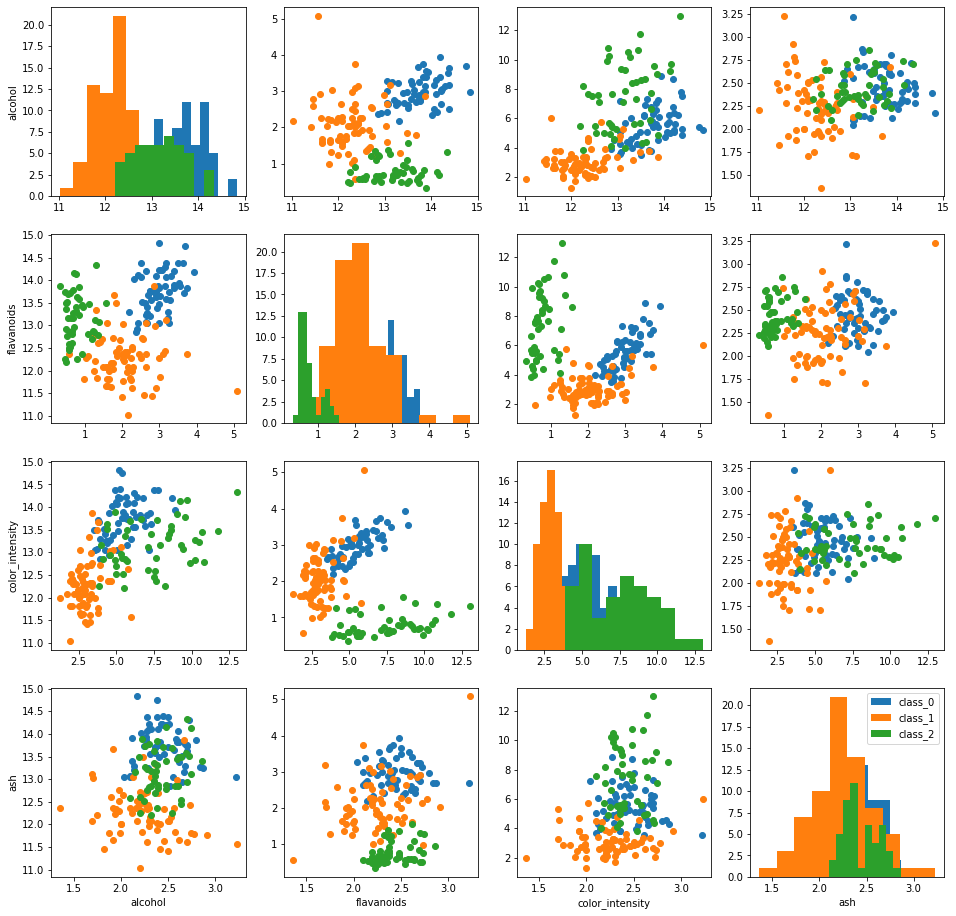

In [3]:
#run the plotting function
myplotGrid(X,y)

In [4]:
#initialise random seed to replicate results over different runs
mySeed = 12345
np.random.seed(mySeed)
XN = X + np.random.normal(0, 0.6, X.shape)

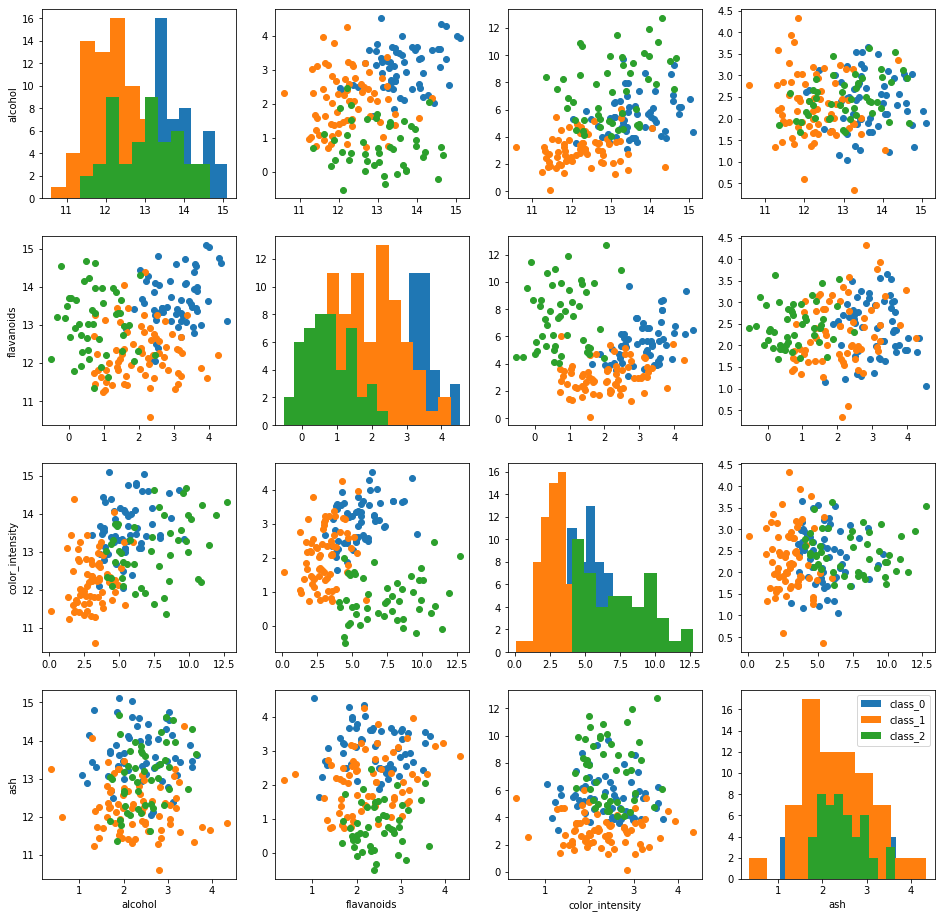

In [5]:
#noise code
myplotGrid(XN, y)

<h2>Q1. Exploratory data analysis </h2>
<p>Based on your exploratory analysis, if you were to build a classifier using only two of the only available features, which ones would you choose and why? Answer as fully as you can. </p>
<br>
<p> I feel that ash and colour intensity should be used to build a classifier as even though noise was added to the data, the graphs that was produced did not change significantly compared to some of the other features. This means that even with noise, it was still able to retain the general shape. Therefore if we use this as features to build a classifier, it would be able to classify the product even with noise. </p>

<h2>Q2. Data with noise </h2>
<p>What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? </p>
<br>
<p>In the scatter plots, it can be seen that before the noise was added, there were many plots where data points were very concentrated. However, after the noise was added, the data points that were very concentrated were now quite spread out.</p>
<p>
In the alcohol vs alcohol histogram, it can be seen that
</p>

<h1>2. Implementing kNN</h1>

In [14]:
# helper code

#Distance functions for options
#Euclidean
def e_Dist(a, b):
    Edist = np.linalg.norm(a-b)
    return Edist

#Manhattan
def m_Dist(a, b):
    if len(a) == len(b):
        Mdist = sum(abs(v1 - v2) for v1, v2 in zip(a, b))
    return Mdist

#split training and test set
def train_test_split(x, y):
    
    #seed to ensure fair testing for scikit
    np.random.seed(12345)
    
    #shuffle the data
    L = list(range(x.shape[0]))
    L = np.random.permutation(L)
    new_x = x[L]
    new_y = y[L]
    
    #split the training data and test data into 80:20
    train_split = int(len(new_x) * 0.8)
    train_x = new_x[0 : train_split]
    train_y = new_y[0 : train_split]
    test_x = new_x[train_split:]
    test_y = new_y[train_split:]
    
    return(train_x, train_y, test_x, test_y)

def mykNN(train_x, train_y, test_x, k, dist):
    prediction = []
    
    #loop through the test set
    for x in test_x:
        #based on the distance type chosen, we loop through the training set
        #This is to find the distance between the current test points and all the training points
        dist_list = []
        if dist == "euclidean":
            for j in train_x:
                dist_list.append(e_Dist(x, j))
        elif dist == "manhattan":
            for j in train_x:
                dist_list.append(m_Dist(x, j))
                
        #We then get the k nearest neighbour
        knn_id = np.argsort(dist_list)[:k]
        
        #We loop through the k nearest neighbour id then we get the class
        knn_y = []
        for l in knn_id:
            knn_y.append(train_y[l])
        
        #We count the counts of each class and the highest number of counts would be the predicted value
        counter = np.bincount(knn_y)
        predicted_class = np.argmax(counter)
        
        prediction.append(predicted_class)
        
    return np.array(prediction)

In [7]:
#mykNN code

#split the data
train_x, train_y, test_x, test_y = train_test_split(X, y)

#predict values
y_prediction = mykNN(train_x, train_y, test_x, 4, "euclidean")

print("Actual Values: \n")
print(test_y)
print("\n")
print("Predicted Values: \n")
print(y_prediction)

Actual Values: 

[1 2 2 1 2 1 0 1 2 1 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


Predicted Values: 

[1 2 2 1 1 1 0 1 2 1 0 2 0 0 0 0 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


<h1>3. Classifier Evaluation </h1>

In [8]:
#confusion matrix, accuracy, precision, recall

def confusion_matrix(predicted_y, test_y, n):
    #create a n dimensional matrix and make it full of 0s
    CM = np.zeros((n,n), dtype=np.int)
    
    #loop through the predicted values
    for i in range(0, len(predicted_y)):
        #go to the location of the array at row of predicted y and column actual y and add 1
        CM[predicted_y[i]][test_y[i]] += 1
    return CM

def Precision(predicted_y, test_y):
    
    #get array of classes
    classes = np.unique(predicted_y)
    
    #get confusion matrix
    con_mat = confusion_matrix(predicted_y, test_y, len(classes))
    
    truep = []
    truep_falsep = []
    
    #loop through to get the true positives and false positives
    for i in range(0, len(classes)):
        tpfp = 0
        for j in classes:
            tpfp += con_mat[i][j]
        truep.append(con_mat[i][i])
        truep_falsep.append(tpfp)
        
    classprec = []
    overalltp = 0
    overalltpfp= 0
    overallprec = 0
    
    #calculate the individual precision for each class and the overall precision
    for k in range(0, len(truep)):
        overalltp += truep[k]
        overalltpfp += truep_falsep[k]
        classprec.append(truep[k]/truep_falsep[k])
    overallprec = overalltp/overalltpfp
    
    return classprec, overallprec

def Recall(predicted_y, test_y):
    #get array of classes
    classes = np.unique(predicted_y)
    
    #get confusion matrix
    con_mat = confusion_matrix(predicted_y, test_y, len(classes))
    
    truep = []
    truep_falsen = []
    
    #loop through to get the true positives and false negatives
    for i in range(0, len(classes)):
        tpfn = 0
        for j in classes:
            tpfn += con_mat[j][i]
        truep.append(con_mat[i][i])
        truep_falsen.append(tpfn)
        
    classrecall = []
    overalltp = 0
    overalltpfn = 0
    overallrecall = 0
    
    #calculate the individual recall for each class and the overall recall
    for k in range(0, len(truep)):
        overalltp += truep[k]
        overalltpfn += truep_falsen[k]
        classrecall.append(truep[k]/truep_falsen[k])
    overallrecall = overalltp/overalltpfn
    
    return classrecall, overallrecall

def Accuracy(predicted_y, test_y):
    
    #create counter and increase by 1 each time it is correct
    counter = 0
    accuracy = 0
    for i in range(0, len(predicted_y)):
        if (predicted_y[i] == test_y[i]):
            counter += 1
            
    accuracy = counter / len(predicted_y)
    
    return accuracy


##printing results from my knn

# class_precision, overall_precision = Precision(y_prediction, test_y)
# class_recall, overall_recall = Recall(y_prediction, test_y)
# accuracy = Accuracy(y_prediction, test_y)

# print("Individual class precision:")
# print("%s \n" %class_precision)
# print("Overall precision: %0.3f \n" %overall_precision)

# print("Individual class recall:")
# print("%s \n" %class_recall)
# print("Overall recall: %0.3f \n" %overall_recall)

# print("Accuracy: %0.3f" %accuracy)

In [9]:
#test evaluation code

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
knn = KNeighborsClassifier(n_neighbors=4, metric="euclidean")
knn.fit(x_train, y_train)
predict_y = knn.predict(x_test)

class_precision, overall_precision = Precision(predict_y, y_test)
class_recall, overall_recall = Recall(predict_y, y_test)
accuracy = Accuracy(predict_y, y_test)

print("Individual class precision:")
print("%s \n" %class_precision)
print("Overall precision: %0.3f \n" %overall_precision)

print("Individual class recall:")
print("%s \n" %class_recall)
print("Overall recall: %0.3f \n" %overall_recall)

print("Accuracy: %0.3f" %accuracy)

Individual class precision:
[1.0, 1.0, 0.9090909090909091] 

Overall precision: 0.972 

Individual class recall:
[1.0, 0.9285714285714286, 1.0] 

Overall recall: 0.972 

Accuracy: 0.972


<h1>4. Nested Cross-validation using your implementation of KNN</h1>

In [19]:
#myNestedCrossVal code

def myNestedCrossVal(x, y, folds, k, dist, mySeed):
    #set the random seed
    np.random.seed(mySeed)
    
    accuracy_list = []
    parameters_list = []
    conf_matrix = []
    
    #shuffle the data
    L = list(range(x.shape[0]))
    L = np.random.permutation(L)
    
    #we will then split the indexes into the number of folds
    split_x = np.array_split(L, folds)
    
    for i in range(0, folds):
        train_list = []
        test_list = []
        val_list = []
        
        #validation set counter
        valCounter = (i + 1) % folds
        
        #loop to take split_x[i] for testing, split_x[i+1] for validation and the rest for training
        for j in range(0, len(split_x)):
            if(i == j):
                test_list = split_x[i]
            elif(j == valCounter):
                val_list = split_x[valCounter]
            else:
                train_list.extend(split_x[j])
                
                
        #save top distance metric, neighbour and accuracy
        topDistance = ""
        noofneighbours = -1
        topAccuracy = -1
        
        #loop through the different distances and no. of neighbours
        for d in dist:
            for nearest in k:
                #using my knn function we get the predicted values and get the accuracy
                y_predict = mykNN(x[train_list], y[train_list], x[val_list], nearest, d)
                accuracy = Accuracy(y_predict, y[val_list])
                
                #check if current accuracy is greater and if it is we get the parameters for the current iteration
                if accuracy > topAccuracy:
                    topDistance = d
                    noofneighbours = nearest
                    topAccuracy = accuracy
                    
        #Once we are done using the validation set we add it to the training set
        train_list.extend(val_list)
        
        #Next we test using the test set and use the top distance and the no. of neighbours
        new_y = mykNN(x[train_list], y[train_list], x[test_list], noofneighbours, topDistance)
        
        #we get the accuracy and add it to the accuracy list and add the current parameters to the parameters list
        new_accuracy = Accuracy(new_y, y[test_list])
        accuracy_list.append(new_accuracy)
        parameters_list.append((topDistance, noofneighbours))
        
        #we get confusion matrix and add it to the confusion matrix list
        uniqueClass = np.unique(new_y)
        con_mat = confusion_matrix(new_y, y[test_list], len(uniqueClass))
        conf_matrix.append(con_mat)
        
    return accuracy_list, parameters_list, conf_matrix

In [23]:
#evaluate clean data code
dist = ["euclidean", "manhattan"]
mySeed = 12345
folds = 5

accuracies, parameters, conf_matrix = myNestedCrossVal(X, y, folds, list(range(1, 11)), dist, mySeed)

#calculate average accuracy and standard deviation
avg_accuracy = np.average(accuracies)
accuracy_std = np.std(accuracies)

In [47]:
#evaluate noisy data code

noisy_acc, noisy_para, noisy_confmat = myNestedCrossVal(XN, y, folds, list(range(1, 11)), dist, mySeed)

#calculate average accuracy and standard deviation
noisy_avg = np.average(noisy_acc)
noisy_std = np.std(noisy_acc)

In [55]:
#print the summaries
import pandas as pd
from IPython.display import display

columns = (["clean accuracy", "clean k", "clean distance"])
columns2 = (["noisy accuracy", "noisy k", "noisy distance"])
fold_counter = np.arange(1, folds+1)

#creating the summary for clean data
clean_dist = []
clean_k = []
clean_acc = []
for i in range(0, len(parameters)):
    clean_dist.append(parameters[i][0])
    clean_k.append(parameters[i][1])
    clean_acc.append(round(accuracies[i], 3))
    
clean_data = np.array([clean_acc, clean_k, clean_dist])
df = pd.DataFrame(clean_data.T, fold_counter, columns)

print("Clean data:")
display(df)
print("total: %f ± %f" %(avg_accuracy, accuracy_std))

for i in range(0, folds - 3):
    print("\n")

#creating the summary for noisy data
noisy_dist = []
noisy_k = []
noisy_accuracies = []
for j in range(0, len(noisy_para)):
    noisy_dist.append(noisy_para[j][0])
    noisy_k.append(noisy_para[j][1])
    noisy_accuracies.append(round(noisy_acc[j], 3))
    
noisy_data = np.array([noisy_accuracies, noisy_k, noisy_dist])
df_noisy = pd.DataFrame(noisy_data.T, fold_counter, columns2)

print("Noisy_data:")
display(df_noisy)
print("total: %f ± %f " %(noisy_avg, noisy_std))


Clean data:


,clean accuracy,clean k,clean distance
1,0.972,3,euclidean
2,0.917,1,euclidean
3,0.944,1,euclidean
4,0.886,5,euclidean
5,0.943,1,euclidean


total: 0.932381 ± 0.029214




Noisy_data:


,noisy accuracy,noisy k,noisy distance
1,0.917,1,euclidean
2,0.861,5,euclidean
3,0.861,4,euclidean
4,0.857,10,manhattan
5,0.943,8,euclidean


total: 0.887778 ± 0.035296 


<h1>5. Summary of results</h1>

In [64]:
#helper function
def summary_conf_matrix(conf_matrix):
    conf = np.zeros(conf_matrix[0].shape)
    
    for c in conf_matrix:
        conf = np.add(conf, c)
        
    return conf

def conf_precision(matrix):
    classes = np.unique(y)
    class_prec = []
    
    #loop through to get the true positives and false positives
    for i in range(0, len(classes)):
        tpfp = 0
        for j in classes:
            tpfp += matrix[i][j]
        class_prec.append(matrix[i][i]/tpfp)
    return class_prec

def conf_recall(matrix):
    classes = np.unique(y)
    class_recall = []
    #loop through to get the true positives and false negatives
    for i in range(0, len(classes)):
        tpfn = 0
        for j in classes:
            tpfn += matrix[j][i]
        class_recall.append(matrix[i][i]/tpfn)
        
    return class_recall

In [74]:
print("CLEAN")
#clean data summary results
display(df)
print("total: %0.3f ± %0.3f\n" %(avg_accuracy, accuracy_std))

clean_matrix = summary_conf_matrix(conf_matrix)
unclean_precision = conf_precision(clean_matrix)
unclean_recall = conf_recall(clean_matrix)
clean_precision = []
clean_recall = []

for i in range(0, len(unclean_precision)):
    clean_precision.append(round(unclean_precision[i], 3))
    clean_recall.append(round(unclean_recall[i], 3))
    
print("confusion matrix:")
print(clean_matrix, "\n")
print("precision : %s\n" %clean_precision)
print("recall : %s\n" %clean_recall)

for j in range(0, folds-3):
    print("\n")

print("NOISY")
#noisy data summary results
display(df_noisy)
print("total: %0.3f ± %0.3f \n" %(noisy_avg, noisy_std))

noisy_matrix = summary_conf_matrix(noisy_confmat)
noisy_precision = conf_precision(noisy_matrix)
noisy_recall = conf_recall(noisy_matrix)
noisy_rounded_precision = []
noisy_rounded_recall = []

for k in range(0, len(noisy_precision)):
    noisy_rounded_precision.append(round(noisy_precision[k], 3))
    noisy_rounded_recall.append(round(noisy_recall[k], 3))

print("confusion matrix:")
print(noisy_matrix, "\n")
print("precision: %s\n" %noisy_rounded_precision)
print("recall: %s\n" %noisy_rounded_recall)

CLEAN


,clean accuracy,clean k,clean distance
1,0.972,3,euclidean
2,0.917,1,euclidean
3,0.944,1,euclidean
4,0.886,5,euclidean
5,0.943,1,euclidean


total: 0.932 ± 0.029

confusion matrix:
[[59.  8.  0.]
 [ 0. 61.  2.]
 [ 0.  2. 46.]] 

precision : [0.881, 0.968, 0.958]

recall : [1.0, 0.859, 0.958]





NOISY


,noisy accuracy,noisy k,noisy distance
1,0.917,1,euclidean
2,0.861,5,euclidean
3,0.861,4,euclidean
4,0.857,10,manhattan
5,0.943,8,euclidean


total: 0.888 ± 0.035 

confusion matrix:
[[53.  8.  3.]
 [ 5. 61.  1.]
 [ 1.  2. 44.]] 

precision: [0.828, 0.91, 0.936]

recall: [0.898, 0.859, 0.917]



<h1>6. More questions </h1>

<h2>Q3. Influence of noise</h2>

<p>
    Do the parameters change when noise is added to data? Can you say that one parameter choice is better regardless of the data used?
</p>

<br>
<p>
    Quite a number of the best parameters change when noise is added. Accuracy generally decreases across the board
</p>